## Stable Model Training

#### NOTES:  
* This is "NoGAN" based training, described in the DeOldify readme.
* This model prioritizes stable and reliable renderings.  It does particularly well on portraits and landscapes.  It's not as colorful as the artistic model.

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1' 
import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks.tensorboard import *
from fastai.vision.gan import *
import fasterai
from fasterai.generators import *
from fasterai.critics import *
from fasterai.dataset import *
from fasterai.loss import *
from fasterai.save import *
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageFile
import sys
sys.path.append('/Projects/mk_utils/mklib/utils/')
sys.path.append('/Projects/mk_utils/mklib/nn/')
from pthnet.pthresnet import PthResNetSimple
from pthnet import pthutils
from pthnet import pthlayer
from pthnet import pthunet

sys.path.append('/Projects/mk_utils/NIR_FR_PTH/')
from config import config

In [24]:
myModel = pthunet.UnetWideModel(config.ModelGan).cuda()

In [29]:
list(myModel.children())[0]==myModel.encoder

True

In [7]:
x = torch.from_numpy(np.zeros([1,3,64,64]).astype(np.float32)).cuda()
y=myModel(x)
y.size()

torch.Size([1, 3, 64, 64])

In [8]:
def set_requires_grad(nets, requires_grad=False):
    """Set requies_grad=Fasle for all the networks to avoid unnecessary computations
    Parameters:
        nets (network list)   -- a list of networks
        requires_grad (bool)  -- whether the networks require gradients or not
    """
    if not isinstance(nets, list):
        nets = [nets]
    for net in nets:
        if net is not None:
            for param in net.parameters():
                param.requires_grad = requires_grad

In [17]:
for param in myModel.model[0].parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [36]:
create_body

AttributeError: module 'torch.nn' has no attribute 'ResnetGenerator'

In [32]:
get_model

<function fastai.torch_core.get_model(model:torch.nn.modules.module.Module)>

In [21]:
myModel = torch.load('/Projects/mk_utils/Convert_Mxnet_to_Pytorch/Pytorch_NewModel.pth')
myModel = list(myModel.children())[0]

In [6]:
encoder = pthutils.cut_model(myModel,config.ModelGan.ftExtractorCutNum)
newModel = pthunet.DynamicUnetWide(encoder, n_classes=config.ModelGan.num_classes_gen, blur=config.ModelGan.blur, 
                                    blur_final=config.ModelGan.blur_final,self_attention=config.ModelGan.self_attention, 
                                    y_range=config.ModelGan.y_range, norm_type=config.ModelGan.norm_type_gen, 
                                    last_cross=config.ModelGan.last_cross, bottle=config.ModelGan.bottle, 
                                    nf_factor=config.ModelGan.nf_factor, bnEps=config.ModelGan.bn_eps, 
                                    bnMom=config.ModelGan.bn_mom, hook_detach=config.ModelGan.hook_detach)

In [4]:
myModel

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
  (2): PReLU(num_parameters=64)
  (3): ResnetBlock_V3(
    (bn_stem): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv_red): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (bn_red): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv_block): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (2): PReLU(num_parameters=64)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    )
  )
  (4): ResnetBlock_V3(
    (bn_stem): BatchNorm2d(64, eps=2

In [7]:
encoder

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
  (2): PReLU(num_parameters=64)
  (3): ResnetBlock_V3(
    (bn_stem): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv_red): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (bn_red): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv_block): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (2): PReLU(num_parameters=64)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    )
  )
  (4): ResnetBlock_V3(
    (bn_stem): BatchNorm2d(64, eps=2

In [23]:
imsize = (112,112)
sfs_szs = fastai.callbacks.hooks.model_sizes(myModel, size=imsize)
sfs_szs

[torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 256, 14, 14]),
 torch.Size([1, 256, 14, 14]),
 torch.Size([1, 256, 14, 14]),
 torch.Size([1, 256, 14, 14]),
 torch.Size([1, 256, 14, 14]),
 torch.Size([1, 512, 7, 7]),
 torch.Size([1, 512, 7, 7]),
 torch.Size([1, 512, 7, 7]),
 torch.Size([1, 512, 7, 7]),
 torch.Size([1, 512, 7, 7]),
 torch.Size([1, 512, 7, 7]),
 torch.Size([1, 512, 7, 7]),
 torch.Size([1, 25088]),
 torch.Size([1, 512]),
 torch.Size([1, 512])]

In [31]:
sfs_szs[-1][1]

512

In [7]:
sfs_idxs = list(reversed(pthutils.get_sfs_idxs(sfs_szs)))
sfs_idxs

[10, 5, 3, 2]

In [8]:
sfs = fastai.callbacks.hooks.hook_outputs([encoder[i] for i in sfs_idxs])
sfs

In [9]:
x = fastai.callbacks.hooks.dummy_eval(encoder, imsize).detach()
x

tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 4.5655e-05,  ..., 1.1840e-04,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0884e-04,
           1.2644e-04, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 1.9200e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 1.1923e-04,  ..., 9.5401e-05,
           1.8085e-04, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000

In [10]:
extra_bn =  cfg['norm_type_gen'] == fastai.vision.NormType.Spectral
ni = sfs_szs[-1][1]
middle_conv = nn.Sequential(pthlayer.custom_conv_layer(ni, ni*2, norm_type=cfg['norm_type_gen'], extra_bn=extra_bn, bnEps=cfg['bn_eps'], bnMom=cfg['bn_mom']),
                            pthlayer.custom_conv_layer(ni*2, ni, norm_type=cfg['norm_type_gen'], extra_bn=extra_bn, bnEps=cfg['bn_eps'], bnMom=cfg['bn_mom'])).eval()
middle_conv

Sequential(
  (0): Sequential(
    (0): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(1024, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
  )
  (1): Sequential(
    (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(512, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
  )
)

In [11]:
x = middle_conv(x)
layers = [encoder, middle_conv]
layers

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
   (2): PReLU(num_parameters=64)
   (3): ResnetBlock_V3(
     (bn_stem): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     (conv_red): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
     (bn_red): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     (conv_block): Sequential(
       (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
       (2): PReLU(num_parameters=64)
       (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (4): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     )
   )
   (4): ResnetBlock_V3(
     (bn_stem): Bat

In [12]:


nf = 512 * cfg['nf_factor']
for i,idx in enumerate(sfs_idxs):
    not_final = i!=len(sfs_idxs)-1
    up_in_c, x_in_c = int(x.shape[1]), int(sfs_szs[idx][1])
    
    do_blur = cfg['blur'] and (not_final or cfg['blur_final'])
    sa = cfg['self_attention'] and (i==len(sfs_idxs)-3)

    n_out = nf if not_final else nf//2
    print('up_in_c, x_in_c, n_out',up_in_c, x_in_c, n_out)
    unet_block = pthunet.UnetBlockWide(up_in_c, x_in_c, n_out, sfs[i], final_div=not_final, blur=cfg['blur'], self_attention=sa,
                           norm_type=cfg['norm_type_gen'], extra_bn=extra_bn).eval()
    layers.append(unet_block)
    x = unet_block(x)

up_in_c, x_in_c, n_out 512 256 1024
up_in_c, x_in_c, n_out 512 128 1024
up_in_c, x_in_c, n_out 512 64 1024
up_in_c, x_in_c, n_out 512 64 512


In [13]:
layers

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
   (2): PReLU(num_parameters=64)
   (3): ResnetBlock_V3(
     (bn_stem): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     (conv_red): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
     (bn_red): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     (conv_block): Sequential(
       (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
       (2): PReLU(num_parameters=64)
       (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (4): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     )
   )
   (4): ResnetBlock_V3(
     (bn_stem): Bat

In [14]:
ni = x.shape[1]
if imsize != sfs_szs[0][-2:]: layers.append(fastai.layers.PixelShuffle_ICNR(ni, **kwargs))
if cfg['last_cross']:
    layers.append(fastai.layers.MergeLayer(dense=True))
    ni += fastai.torch_core.in_channels(encoder)
    layers.append(fastai.layers.res_block(ni, bottle=cfg['bottle'], norm_type=cfg['norm_type_gen']))
layers += [pthlayer.custom_conv_layer(ni, cfg['num_classes_gen'], ks=1, use_activ=False, norm_type=cfg['norm_type_gen'], bnEps=cfg['bn_eps'], bnMom=cfg['bn_mom'])]

if cfg['y_range'] is not None: layers.append(fastai.layers.SigmoidRange(*cfg['y_range']))
#super().__init__(*layers)

In [15]:
layers

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
   (2): PReLU(num_parameters=64)
   (3): ResnetBlock_V3(
     (bn_stem): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     (conv_red): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
     (bn_red): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     (conv_block): Sequential(
       (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
       (2): PReLU(num_parameters=64)
       (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (4): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
     )
   )
   (4): ResnetBlock_V3(
     (bn_stem): Bat

In [18]:
SequentialEx

fastai.layers.SequentialEx

In [11]:
Learner
#hook_outputs
#listify
apply_init
cnn_config
models
fastai.vision.NormType
fastai.callbacks.hooks.model_sizes
fastai.callbacks.hooks.hook_outputs
fastai.callbacks.hooks.dummy_eval
relu

<function fastai.layers.relu(inplace:bool=False, leaky:float=None)>

In [12]:
create_body
DynamicUnetWide
init_default

<function fastai.torch_core.init_default(m:torch.nn.modules.module.Module, func:Callable[[torch.nn.modules.module.Module], NoneType]=<function kaiming_normal_ at 0x7f4a68cc6f28>) -> None>

In [16]:
SelfAttention

fastai.layers.SelfAttention

In [34]:
sum([[1,2,3],[4,5,6]],[])

[1, 2, 3, 4, 5, 6]

In [36]:
isinstance

<function isinstance(obj, class_or_tuple, /)>

## Setup

In [37]:
#path = Path('data/imagenet/ILSVRC/Data/CLS-LOC')
#path_hr = path
#path_lr = path/'bandw'

path = Path('/Projects/NIR_FR_PTH/CASIA/VIS_ALIGN')
path_lr = path#/'hr'/'lr'
path_hr = path#/'hr'/'lr'

proj_id = 'StableModel'

gen_name = proj_id + '_gen'
pre_gen_name = gen_name + '_0'
crit_name = proj_id + '_crit'

name_gen = proj_id + '_image_gen'
path_gen = path/name_gen

TENSORBOARD_PATH = Path('data/tensorboard/' + proj_id)

nf_factor = 2
pct_start = 1e-8

In [60]:
aa = (ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1))#.use_partial_data(sample_pct=0.5)

In [62]:
type(aa.label_from_func)

function

In [84]:
data = (aa.label_from_func(lambda x: path_hr/x.relative_to(path_lr)))
print(type(data))
print(type(data.x))
print(type(data.train))
print(type(data.train.x))
data.train.x[0].apply_tfms

<class 'fastai.data_block.LabelLists'>
<class 'fastai.vision.data.ImageImageList'>
<class 'fastai.data_block.LabelList'>
<class 'fastai.vision.data.ImageImageList'>


<bound method Image.apply_tfms of Image (3, 112, 112)>

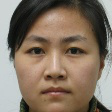

In [80]:
data.train.x[0]

In [75]:
 data1 = (data.transform(get_transforms(max_zoom=1.2, max_lighting=0.5, max_warp=0.25, xtra_tfms=[]), size=64, tfm_y=True))

In [91]:
im=Image.open('/Projects/NIR_FR_PTH/Oulu_ALIGN/VL/Dark/P001/Anger/000.jpeg')
im.show()

In [87]:
from data import create_dataset

ModuleNotFoundError: No module named 'data'

In [14]:
def get_data(bs:int, sz:int, keep_pct:float):
    return get_colorize_data(sz=sz, bs=bs, crappy_path=path_lr, good_path=path_hr, 
                             random_seed=None, keep_pct=keep_pct)

def get_crit_data(classes, bs, sz):
    src = ImageList.from_folder(path, include=classes, recurse=True).random_split_by_pct(0.1, seed=42)
    ll = src.label_from_folder(classes=classes)
    data = (ll.transform(get_transforms(max_zoom=2.), size=sz)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

def create_training_images(fn,i):
    dest = path_lr/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn).convert('LA').convert('RGB')
    img.save(dest)  
    
def save_preds(dl):
    i=0
    names = dl.dataset.items
    
    for b in dl:
        preds = learn_gen.pred_batch(batch=b, reconstruct=True)
        for o in preds:
            o.save(path_gen/names[i].name)
            i += 1
    
def save_gen_images():
    if path_gen.exists(): shutil.rmtree(path_gen)
    path_gen.mkdir(exist_ok=True)
    data_gen = get_data(bs=bs, sz=sz, keep_pct=0.085)
    save_preds(data_gen.fix_dl)
    PIL.Image.open(path_gen.ls()[0])

## Create black and white training images

Only runs if the directory isn't already created.

In [15]:
if not path_lr.exists():
    il = ImageList.from_folder(path_hr)
    parallel(create_training_images, il.items)

## Pre-train generator

#### NOTE
Most of the training takes place here in pretraining for NoGAN.  The goal here is to take the generator as far as possible with conventional training, as that is much easier to control and obtain glitch-free results compared to GAN training.

### 64px

In [16]:
bs=8
sz=64
keep_pct=1.0

In [17]:
data_gen = get_data(bs=bs, sz=sz, keep_pct=keep_pct)

src_type:  <class 'fastai.data_block.ItemLists'>
data.train.x type:  <class 'fastai.vision.data.ImageImageList'>
data.train.x type:  <class 'fastai.vision.data.ImageImageList'>
data_type3:  <class 'fastai.vision.data.ImageDataBunch'>


In [18]:
learn_gen = gen_learner_wide(data=data_gen, gen_loss=FeatureLoss(), nf_factor=nf_factor)

In [20]:
learn_gen.callbacks
learn_gen.callback_fns

[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)]

In [61]:
OneCycleScheduler

NameError: name 'OneCycleScheduler' is not defined

In [99]:
x = torch.from_numpy(np.zeros([1,3,112,112]).astype(np.float32)).cuda()
y=learn_gen.model(x)
y.size()

torch.Size([1, 3, 112, 112])

In [9]:
learn_gen.callback_fns.append(partial(ImageGenTensorboardWriter, base_dir=TENSORBOARD_PATH, name='GenPre'))

In [11]:
learn_gen.fit_one_cycle(1, pct_start=0.8, max_lr=slice(1e-3))

CRITICAL:root:Cannot load caffe2.python. Error: /opt/pytorch/pytorch/torch/lib/python3.6/site-packages/caffe2/python/caffe2_pybind11_state.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN5fLI6438FLAGS_caffe2_max_keep_on_shrink_memoryE
/opt/conda/lib/python3.6/site-packages/torch/onnx/utils.py:501: UserWarning: ONNX export failed on ATen operator reshape because torch.onnx.symbolic.reshape does not exist
  .format(op_name, op_name))
/opt/conda/lib/python3.6/site-packages/torch/onnx/utils.py:501: UserWarning: ONNX export failed on ATen operator mv because torch.onnx.symbolic.mv does not exist
  .format(op_name, op_name))
/opt/conda/lib/python3.6/site-packages/torch/onnx/utils.py:501: UserWarning: ONNX export failed on ATen operator dot because torch.onnx.symbolic.dot does not exist
  .format(op_name, op_name))


/opt/conda/lib/python3.6/site-packages/torch/onnx/utils.py:501: UserWarning: ONNX export failed on ATen operator reshape because torch.onnx.symbolic.reshape does not exist
  .format(op_name, op_name))
/opt/conda/lib/python3.6/site-packages/torch/onnx/utils.py:501: UserWarning: ONNX export failed on ATen operator mv because torch.onnx.symbolic.mv does not exist
  .format(op_name, op_name))
/opt/conda/lib/python3.6/site-packages/torch/onnx/utils.py:501: UserWarning: ONNX export failed on ATen operator dot because torch.onnx.symbolic.dot does not exist
  .format(op_name, op_name))
/opt/conda/lib/python3.6/site-packages/torch/onnx/symbolic.py:131: UserWarning: ONNX export failed on dim because ONNX and PyTorch use different strategies to split the input. not supported
  warnings.warn("ONNX export failed on " + op + " because " + msg + " not supported")


graph(%0 : Float(1, 3, 64, 64)
      %1 : Float(64, 3, 7, 7)
      %2 : Float(64)
      %3 : Float(64)
      %4 : Float(64)
      %5 : Float(64)
      %6 : Long()
      %7 : Float(64, 64, 1, 1)
      %8 : Float(64)
      %9 : Float(64)
      %10 : Float(64)
      %11 : Float(64)
      %12 : Long()
      %13 : Float(64, 64, 3, 3)
      %14 : Float(64)
      %15 : Float(64)
      %16 : Float(64)
      %17 : Float(64)
      %18 : Long()
      %19 : Float(256, 64, 1, 1)
      %20 : Float(256)
      %21 : Float(256)
      %22 : Float(256)
      %23 : Float(256)
      %24 : Long()
      %25 : Float(256, 64, 1, 1)
      %26 : Float(256)
      %27 : Float(256)
      %28 : Float(256)
      %29 : Float(256)
      %30 : Long()
      %31 : Float(64, 256, 1, 1)
      %32 : Float(64)
      %33 : Float(64)
      %34 : Float(64)
      %35 : Float(64)
      %36 : Long()
      %37 : Float(64, 64, 3, 3)
      %38 : Float(64)
      %39 : Float(64)
      %40 : Float(64)
      %41 : Float(64)
      %42 : Lo

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/site-packages/fastai/callbacks/tensorboard.py", line 227, in _queue_processor
    request.write()
  File "/opt/conda/lib/python3.6/site-packages/fastai/callbacks/tensorboard.py", line 417, in write
    self.tbwriter.add_graph(model=self.model, input_to_model=self.input_to_model)
  File "/opt/conda/lib/python3.6/site-packages/tensorboardX/writer.py", line 566, in add_graph
    self.file_writer.add_graph(graph(model, input_to_model, verbose))
  File "/opt/conda/lib/python3.6/site-packages/tensorboardX/writer.py", line 107, in add_graph
    graph = graph_profile[0]
TypeError: 'GraphDef' object does not support indexing

/opt/conda/lib/python3.6/site-packages/torch/onnx/utils.py:501: UserWarni

KeyboardInterrupt: 

In [15]:
learn_gen.save(pre_gen_name)

In [16]:
learn_gen.unfreeze()

In [17]:
learn_gen.fit_one_cycle(1, pct_start=pct_start,  max_lr=slice(3e-7, 3e-4))

CRITICAL:root:Cannot load caffe2.python. Error: /opt/pytorch/pytorch/torch/lib/python3.6/site-packages/caffe2/python/caffe2_pybind11_state.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN5fLI6438FLAGS_caffe2_max_keep_on_shrink_memoryE
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

In [18]:
learn_gen.save(pre_gen_name)

### 128px

In [19]:
bs=8
sz=128
keep_pct=1.0

In [20]:
learn_gen.data = get_data(sz=sz, bs=bs, keep_pct=keep_pct)

In [21]:
learn_gen.unfreeze()

In [22]:
learn_gen.fit_one_cycle(1, pct_start=pct_start, max_lr=slice(1e-7,1e-4))

CRITICAL:root:Cannot load caffe2.python. Error: /opt/pytorch/pytorch/torch/lib/python3.6/site-packages/caffe2/python/caffe2_pybind11_state.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN5fLI6438FLAGS_caffe2_max_keep_on_shrink_memoryE
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

In [23]:
learn_gen.save(pre_gen_name)

### 192px

In [24]:
bs=4
sz=192
keep_pct=0.50

In [25]:
learn_gen.data = get_data(sz=sz, bs=bs, keep_pct=keep_pct)

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]


In [26]:
learn_gen.unfreeze()

In [27]:
learn_gen.fit_one_cycle(1, pct_start=pct_start, max_lr=slice(5e-8,5e-5))

CRITICAL:root:Cannot load caffe2.python. Error: /opt/pytorch/pytorch/torch/lib/python3.6/site-packages/caffe2/python/caffe2_pybind11_state.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN5fLI6438FLAGS_caffe2_max_keep_on_shrink_memoryE
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

In [28]:
learn_gen.save(pre_gen_name)

## Repeatable GAN Cycle

#### NOTE
Best results so far have been based on repeating the cycle below a few times (about 5-8?), until diminishing returns are hit (no improvement in image quality).  Each time you repeat the cycle, you want to increment that old_checkpoint_num by 1 so that new check points don't overwrite the old.  

In [29]:
old_checkpoint_num = 0
checkpoint_num = old_checkpoint_num + 1
gen_old_checkpoint_name = gen_name + '_' + str(old_checkpoint_num)
gen_new_checkpoint_name = gen_name + '_' + str(checkpoint_num)
crit_old_checkpoint_name = crit_name + '_' + str(old_checkpoint_num)
crit_new_checkpoint_name= crit_name + '_' + str(checkpoint_num)

### Save Generated Images

In [30]:
bs=8
sz=192

In [36]:
learn_gen = gen_learner_wide(data=data_gen, gen_loss=FeatureLoss(), nf_factor=nf_factor).load(gen_old_checkpoint_name, with_opt=False)

In [37]:
save_gen_images()

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]


### Pretrain Critic

##### Only need full pretraining of critic when starting from scratch.  Otherwise, just finetune!

/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:203: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")
/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
VIS_ALIGN
  if getattr(ds, 'warn', False): warn(ds.warn)
/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
VIS_ALIGN
  if getattr(ds, 'warn', False): warn(ds.warn)
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
 

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

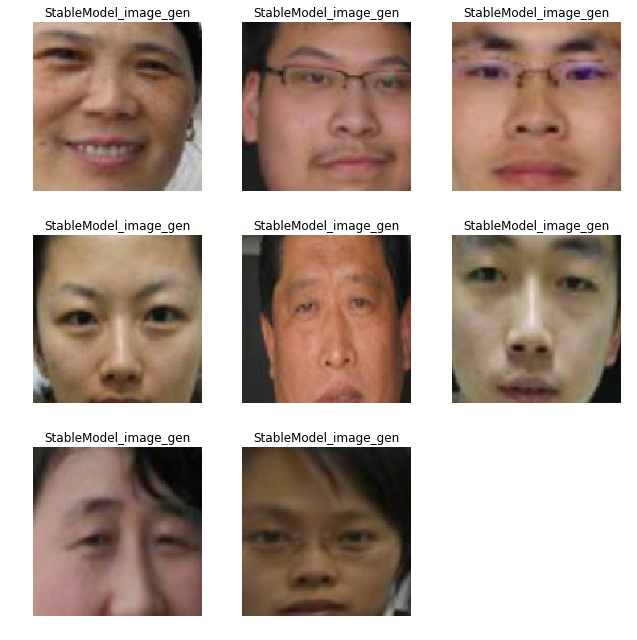

In [38]:
if old_checkpoint_num == 0:
    bs=8
    sz=128
    learn_gen=None
    gc.collect()
    data_crit = get_crit_data([name_gen, 'test'], bs=bs, sz=sz)
    data_crit.show_batch(rows=3, ds_type=DatasetType.Train, imgsize=3)
    learn_critic = colorize_crit_learner(data=data_crit, nf=256)
    learn_critic.callback_fns.append(partial(LearnerTensorboardWriter, base_dir=TENSORBOARD_PATH, name='CriticPre'))
    learn_critic.fit_one_cycle(6, 1e-3)
    learn_critic.save(crit_old_checkpoint_name)

In [39]:
bs=16
sz=192

In [40]:
data_crit = get_crit_data([name_gen, 'test'], bs=bs, sz=sz)

/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:203: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")
/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
VIS_ALIGN
  if getattr(ds, 'warn', False): warn(ds.warn)
/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
VIS_ALIGN
  if getattr(ds, 'warn', False): warn(ds.warn)
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
 

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

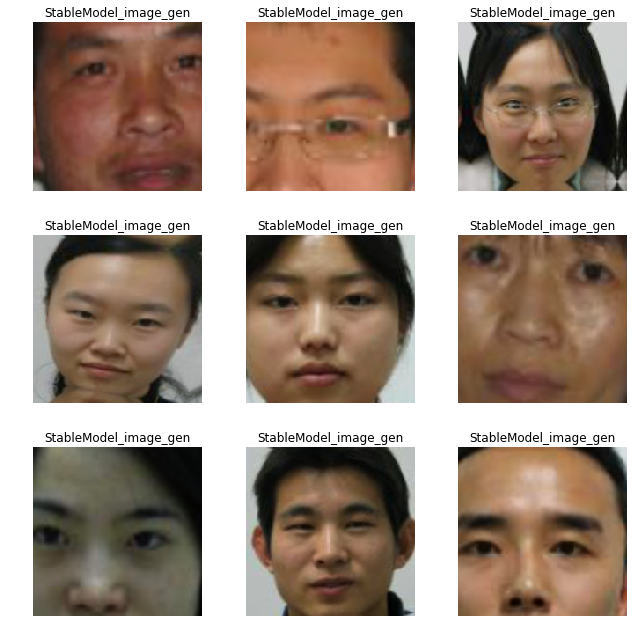

In [41]:
data_crit.show_batch(rows=3, ds_type=DatasetType.Train, imgsize=3)

In [42]:
learn_critic = colorize_crit_learner(data=data_crit, nf=256).load(crit_old_checkpoint_name, with_opt=False)

In [43]:
learn_critic.callback_fns.append(partial(LearnerTensorboardWriter, base_dir=TENSORBOARD_PATH, name='CriticPre'))

In [44]:
learn_critic.fit_one_cycle(4, 1e-4)

CRITICAL:root:Cannot load caffe2.python. Error: /opt/pytorch/pytorch/torch/lib/python3.6/site-packages/caffe2/python/caffe2_pybind11_state.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN5fLI6438FLAGS_caffe2_max_keep_on_shrink_memoryE
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

In [46]:
learn_critic.save(crit_new_checkpoint_name)

### GAN

In [47]:
learn_crit=None
learn_gen=None
gc.collect()

71

In [54]:
lr=2e-5
sz=192
bs=2

In [55]:
data_crit = get_crit_data([name_gen, 'test'], bs=bs, sz=sz)

/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:203: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")
/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
VIS_ALIGN
  if getattr(ds, 'warn', False): warn(ds.warn)
/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
VIS_ALIGN
  if getattr(ds, 'warn', False): warn(ds.warn)


In [56]:
learn_crit = colorize_crit_learner(data=data_crit, nf=256).load(crit_new_checkpoint_name, with_opt=False)

RuntimeError: CUDA out of memory. Tried to allocate 128.00 MiB (GPU 0; 10.92 GiB total capacity; 10.16 GiB already allocated; 29.50 MiB free; 144.11 MiB cached)

In [51]:
learn_gen = gen_learner_wide(data=data_gen, gen_loss=FeatureLoss(), nf_factor=nf_factor).load(gen_old_checkpoint_name, with_opt=False)

In [52]:
switcher = partial(AdaptiveGANSwitcher, critic_thresh=0.65)
learn = GANLearner.from_learners(learn_gen, learn_crit, weights_gen=(1.0,1.5), show_img=False, switcher=switcher,
                                 opt_func=partial(optim.Adam, betas=(0.,0.9)), wd=1e-3)
learn.callback_fns.append(partial(GANDiscriminativeLR, mult_lr=5.))
learn.callback_fns.append(partial(GANTensorboardWriter, base_dir=TENSORBOARD_PATH, name='GanLearner', visual_iters=100))
learn.callback_fns.append(partial(GANSaveCallback, learn_gen=learn_gen, filename=gen_new_checkpoint_name, save_iters=100))

#### Instructions:  
Find the checkpoint just before where glitches start to be introduced.  This is all very new so you may need to play around with just how far you go here with keep_pct.

In [53]:
learn.data = get_data(sz=sz, bs=bs, keep_pct=0.03)
learn_gen.freeze_to(-1)
learn.fit(1,lr)

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
CRITICAL:root:Cannot load caffe2.python. Error: /opt/pytorch/pytorch/torch/lib/python3.6/site-packages/caffe2/python/caffe2_pybind11_state.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN5fLI6438FLAGS_caffe2_max_keep_on_shrink_memoryE
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/fastai/vision/transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/opt/conda/lib/python3.6/site-packages/f

RuntimeError: CUDA out of memory. Tried to allocate 144.00 MiB (GPU 0; 10.92 GiB total capacity; 10.08 GiB already allocated; 29.50 MiB free; 223.00 MiB cached)

In [19]:
Callable

typing.Callable

In [20]:
fastai.core.typing.Callable

typing.Callable

In [5]:
Learner

fastai.basic_train.Learner

In [6]:
split_model

<function fastai.torch_core.split_model(model:torch.nn.modules.module.Module=None, splits:Collection[Union[torch.nn.modules.module.Module, Collection[torch.nn.modules.module.Module]]]=None)>

In [7]:
apply_init

<function fastai.torch_core.apply_init(m, init_func:Callable[[torch.nn.modules.module.Module], NoneType])>

In [8]:
OneCycleScheduler

NameError: name 'OneCycleScheduler' is not defined

In [9]:
fastai.callbacks.one_cycle.OneCycleScheduler

fastai.callbacks.one_cycle.OneCycleScheduler

In [10]:
CallbackHandler

fastai.callback.CallbackHandler

In [11]:
encoder.train

<bound method Module.train of Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
  (2): PReLU(num_parameters=64)
  (3): ResnetBlock_V3(
    (bn_stem): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv_red): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (bn_red): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv_block): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (2): PReLU(num_parameters=64)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
    )
  )
  (4): ResnetBlock_V3(
    (b

In [12]:
field

<function dataclasses.field(*, default=<dataclasses._MISSING_TYPE object at 0x7f7fca8d5400>, default_factory=<dataclasses._MISSING_TYPE object at 0x7f7fca8d5400>, init=True, repr=True, hash=None, compare=True, metadata=None)>

In [33]:
get_files('/Projects/Downloads', extensions='.pdf')

[PosixPath('/Projects/Downloads/Ian Goodfellow, Yoshua Bengio, Aaron Courville - Deep Learning [pre-pub version]-MIT Press (2016).pdf'),
 PosixPath('/Projects/Downloads/Face_Matching_Between_Near_Infrared_and_Visible_Li (1).pdf'),
 PosixPath('/Projects/Downloads/ImageColorizationusingGenerativeAdversarialNetworks.pdf'),
 PosixPath('/Projects/Downloads/Face_Matching_Between_Near_Infrared_and_Visible_Li.pdf'),
 PosixPath('/Projects/Downloads/Adrian Rosebrock - Deep Learning for Computer Vision with Python. 3-ImageNetBundle-PyImageSearch (2017).pdf'),
 PosixPath('/Projects/Downloads/The_BUAA-VisNir_Face_Database_Instructions.pdf')]

In [34]:
Path('/Projects/Downloads').parts

('/', 'Projects', 'Downloads')

In [35]:
Dataset

torch.utils.data.dataset.Dataset

In [37]:
import dominate

ModuleNotFoundError: No module named 'dominate'